In [1]:
# !pip install lightgbm

### 분류 모델

In [2]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family= 'Malgun Gothic')
plt.rcParams['axes.unicode_minus']= False

In [3]:
cancer= load_breast_cancer()
x_train, x_test, y_train, y_test= train_test_split(cancer.data, cancer.target,
                                                   random_state= 0)

In [4]:
lgb= LGBMClassifier(n_estimators= 100, random_state= 0)

In [5]:
lgb.fit(x_train, y_train)

LGBMClassifier(random_state=0)

In [6]:
pred= lgb.predict(x_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [7]:
lgb.score(x_train, y_train)

1.0

In [8]:
lgb.score(x_test, y_test)

0.972027972027972

### 사전 가지치기

In [9]:
lgb= LGBMClassifier(random_state= 42, max_depth= 1)

In [10]:
lgb.fit(x_train, y_train)

LGBMClassifier(max_depth=1, random_state=42)

In [11]:
lgb.score(x_train, y_train)

0.9882629107981221

In [12]:
lgb.score(x_test, y_test)

0.965034965034965

### 학습률 낮추기

In [13]:
lgb= LGBMClassifier(n_estimators= 100, random_state= 0, learning_rate= 0.01)

In [14]:
lgb.fit(x_train, y_train)

LGBMClassifier(learning_rate=0.01, random_state=0)

In [15]:
lgb.score(x_train, y_train)

0.9812206572769953

In [16]:
lgb.score(x_test, y_test)

0.958041958041958

### 특성 중요도 시각화

(-1.0, 30.0)

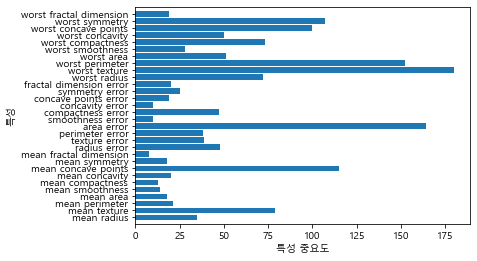

In [17]:
n_features= cancer.data.shape[1]
plt.barh(np.arange(n_features), lgb.feature_importances_, align= 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)

### 회귀 모델

In [18]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore', category= FutureWarning)
from lightgbm import LGBMRegressor
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
boston= load_boston()
x_train, x_test, y_train, y_test= train_test_split(boston.data,
                                                   boston.target,
                                                   test_size= 0.3)

In [20]:
lgb= LGBMRegressor(n_estimators= 100, learning_rate= 0.01, random_state= 0, max_depth= 3)

In [21]:
lgb.fit(x_train, y_train)

LGBMRegressor(learning_rate=0.01, max_depth=3, random_state=0)

(-1.0, 13.0)

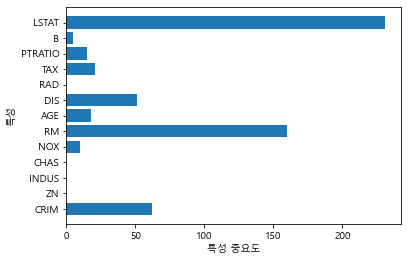

In [22]:
n_features= boston.data.shape[1]
plt.barh(np.arange(n_features), lgb.feature_importances_, align= 'center')
plt.yticks(np.arange(n_features), boston.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)

In [23]:
pred= lgb.predict(x_test)
pred

array([15.0284825 , 19.08687486, 15.0284825 , 16.91333718, 21.3890144 ,
       29.54760994, 23.63765272, 28.76464667, 15.0284825 , 19.12577198,
       30.34229623, 19.94183375, 16.2070634 , 15.0284825 , 23.38079733,
       25.02086058, 19.39701692, 21.87907975, 23.89383644, 24.52970209,
       21.76985962, 22.12583452, 23.38079733, 23.84853874, 25.13466431,
       22.12583452, 23.63765272, 17.67441804, 19.17494027, 18.77779306,
       20.71968405, 19.39658441, 15.0284825 , 23.63765272, 18.82467759,
       21.84486716, 16.75427554, 23.63765272, 37.06090802, 16.2070634 ,
       21.53130685, 29.05529987, 24.52970209, 18.09353576, 36.70247627,
       21.33626831, 23.63765272, 21.33626831, 16.36375735, 23.63765272,
       24.52970209, 20.27003172, 18.85108634, 33.54498499, 36.70247627,
       36.398596  , 21.66135993, 15.0284825 , 18.82467759, 26.87193489,
       15.18754414, 15.18754414, 36.92798451, 20.22054194, 21.48907151,
       15.0284825 , 21.749017  , 18.28003792, 27.91296999, 15.02

In [24]:
lgb.score(x_train, y_train)

0.7051257276180736

In [25]:
lgb.score(x_test, y_test)

0.6918993057794995